In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import cv2
import matplotlib.pyplot as plt
#plt.style.use("fivethirtyeight")

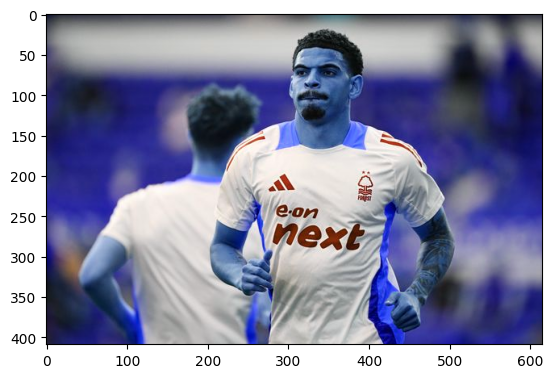

In [3]:
img = cv2.imread("/kaggle/input/sports-cleb/CelebrityFaceRecognition_images_dataset/morgan/0_Nottingham-Forests-Morgan-Gibbs-White-against-Brentford.jpg")
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [5]:
face_cascade = cv2.CascadeClassifier('/kaggle/input/haarcascade-frontalface-default/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier("/kaggle/input/eye-cascade/haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[292,  39,  81,  81]], dtype=int32)

In [6]:
(x,y,w,h) = faces[0]

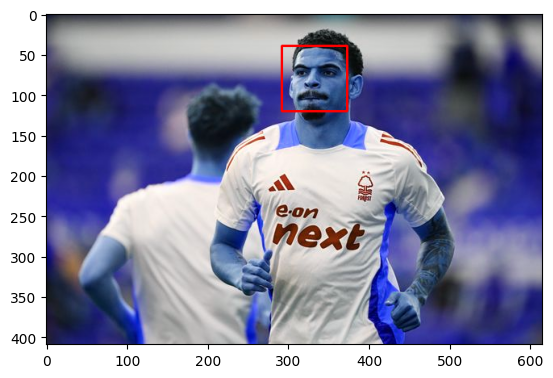

In [7]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

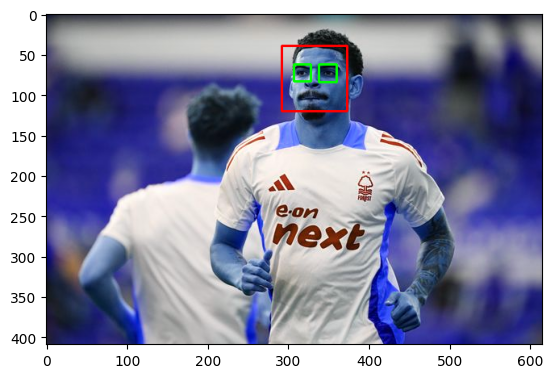

In [8]:
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(img, cmap="gray")
plt.show()

In [9]:
def get_cropped_image_if_2eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

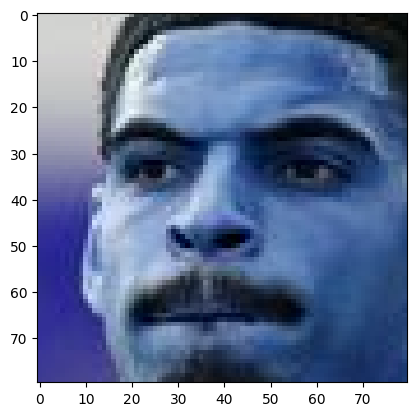

In [10]:
croped_img = get_cropped_image_if_2eyes("/kaggle/input/sports-cleb/CelebrityFaceRecognition_images_dataset/morgan/0_Nottingham-Forests-Morgan-Gibbs-White-against-Brentford.jpg")
plt.imshow(croped_img)

In [11]:
path_to_data = "/kaggle/input/sports-cleb/CelebrityFaceRecognition_images_dataset"
path_to_cr_data = "/kaggle/working/cropped/"

In [12]:
img_dirs= []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
img_dirs

['/kaggle/input/sports-cleb/CelebrityFaceRecognition_images_dataset/roger_federer',
 '/kaggle/input/sports-cleb/CelebrityFaceRecognition_images_dataset/morgan',
 '/kaggle/input/sports-cleb/CelebrityFaceRecognition_images_dataset/serena_williams',
 '/kaggle/input/sports-cleb/CelebrityFaceRecognition_images_dataset/lionel_messi',
 '/kaggle/input/sports-cleb/CelebrityFaceRecognition_images_dataset/maria_sharapova']

In [13]:
os.mkdir(path_to_cr_data)

In [14]:
import pathlib

cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split("/")[-1]
    print(celebrity_name)

    celebrity_file_names_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
            # 1. Ensure it's a file and has a valid image extension
        if not entry.is_file():
                continue
    
            # 2. Get full path as a proper Path object to handle special characters and be OS-safe
        image_path = pathlib.Path(entry.path)
    
        if image_path.suffix.lower() not in ['.jpg', '.jpeg', '.png']:
                continue
    
            # 3. Use string version of the path to pass to OpenCV
        roi_color = get_cropped_image_if_2eyes(str(image_path))
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print(f"Generating cropped images in folder {cropped_folder}")
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
    
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count +=1

roger_federer
Generating cropped images in folder /kaggle/working/cropped/roger_federer
morgan
Generating cropped images in folder /kaggle/working/cropped/morgan
serena_williams
Generating cropped images in folder /kaggle/working/cropped/serena_williams
lionel_messi
Generating cropped images in folder /kaggle/working/cropped/lionel_messi
maria_sharapova
Generating cropped images in folder /kaggle/working/cropped/maria_sharapova


In [35]:
!rm -rf /kaggle/working/cropped/morgan/morgan5.png
!rm -rf /kaggle/working/cropped/morgan/morgan1.png
!rm -rf /kaggle/working/cropped/morgan/morgan4.png

!rm -rf /kaggle/working/cropped/roger_federer/roger_federer2.png
!rm -rf /kaggle/working/cropped/roger_federer/roger_federer14.png
!rm -rf /kaggle/working/cropped/roger_federer/roger_federer18.png
!rm -rf /kaggle/working/cropped/roger_federer/roger_federer27.png
!rm -rf /kaggle/working/cropped/roger_federer/roger_federer28.png

!rm -rf /kaggle/working/cropped/serena_williams/serena_williams15.png
!rm -rf /kaggle/working/cropped/serena_williams/serena_williams16.png
!rm -rf /kaggle/working/cropped/serena_williams/serena_williams2.png
!rm -rf /kaggle/working/cropped/serena_williams/serena_williams19.png
!rm -rf /kaggle/working/cropped/serena_williams/serena_williams21.png
!rm -rf /kaggle/working/cropped/serena_williams/serena_williams26.png
!rm -rf /kaggle/working/cropped/serena_williams/serena_williams29.png
!rm -rf /kaggle/working/cropped/serena_williams/serena_williams3.png
!rm -rf /kaggle/working/cropped/serena_williams/serena_williams34.png

!rm -rf /kaggle/working/cropped/lionel_messi/lionel_messi23.png
!rm -rf /kaggle/working/cropped/lionel_messi/lionel_messi20.png
!rm -rf /kaggle/working/cropped/lionel_messi/lionel_messi28.png
!rm -rf /kaggle/working/cropped/lionel_messi/lionel_messi3.png

In [36]:
import pywt

def w2d(img, mode="haar", level= 1):
    imArray = img
    imArray = cv2.cvtColor(imArray, cv2.COLOR_BGR2GRAY)
    imArray = np.float32(imArray)
    imArray /= 255;

    coeffs = pywt.wavedec2(imArray, mode, level = level)

    coeffs_H= list(coeffs)
    coeffs_H[0] *=0;

    imArray_H = pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)

    return imArray_H

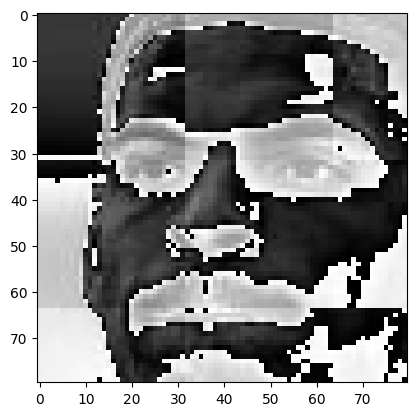

In [37]:
im_har = w2d(croped_img, "db1",5)
plt.imshow(im_har, cmap="gray")

In [38]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count +=1
class_dict

{'roger_federer': 0,
 'morgan': 1,
 'serena_williams': 2,
 'lionel_messi': 3,
 'maria_sharapova': 4}

In [39]:
X = []
y = []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img,(32,32))
        img_har = w2d(img, "db1", 5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1), scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

[ WARN:0@723.356] global loadsave.cpp:268 findDecoder imread_('/kaggle/working/cropped/roger_federer/roger_federer2.png'): can't open/read file: check file path/integrity
[ WARN:0@723.428] global loadsave.cpp:268 findDecoder imread_('/kaggle/working/cropped/roger_federer/roger_federer14.png'): can't open/read file: check file path/integrity
[ WARN:0@723.436] global loadsave.cpp:268 findDecoder imread_('/kaggle/working/cropped/roger_federer/roger_federer18.png'): can't open/read file: check file path/integrity
[ WARN:0@723.496] global loadsave.cpp:268 findDecoder imread_('/kaggle/working/cropped/roger_federer/roger_federer27.png'): can't open/read file: check file path/integrity
[ WARN:0@723.496] global loadsave.cpp:268 findDecoder imread_('/kaggle/working/cropped/roger_federer/roger_federer28.png'): can't open/read file: check file path/integrity
[ WARN:0@723.500] global loadsave.cpp:268 findDecoder imread_('/kaggle/working/cropped/morgan/morgan1.png'): can't open/read file: check file

In [40]:
X = np.array(X).reshape(len(X), 4096).astype(float)
X.shape

(158, 4096)

### Train the model

In [65]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=42)

pipe = Pipeline([("scaler", StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.71875

In [43]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.60      1.00      0.75         6
           2       0.67      0.50      0.57         4
           3       1.00      0.50      0.67         6
           4       0.71      1.00      0.83        10

    accuracy                           0.72        32
   macro avg       0.80      0.67      0.66        32
weighted avg       0.79      0.72      0.69        32



In [44]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [56]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [10,50,100,200],
            'randomforestclassifier__max_depth': [3, 5, 10, None]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [3,4,5,6,7]
        }
    }
}

In [58]:
scores = []
best_estimators = {}
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False, verbose=1,n_jobs=-1)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


,model,best_score,best_params
0,svm,0.761846,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.730462,"{'randomforestclassifier__max_depth': 10, 'ran..."
2,logistic_regression,0.800923,{'logisticregression__C': 3}


In [63]:
best_estimators["logistic_regression"].score(X_test,y_test)

0.8125

In [64]:
best_clf = best_estimators['logistic_regression']

In [66]:
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm


array([[ 4,  1,  0,  0,  1],
       [ 0,  6,  0,  0,  0],
       [ 0,  0,  2,  1,  1],
       [ 0,  1,  0,  4,  1],
       [ 0,  0,  0,  0, 10]])

Text(95.72222222222221, 0.5, 'Truth')

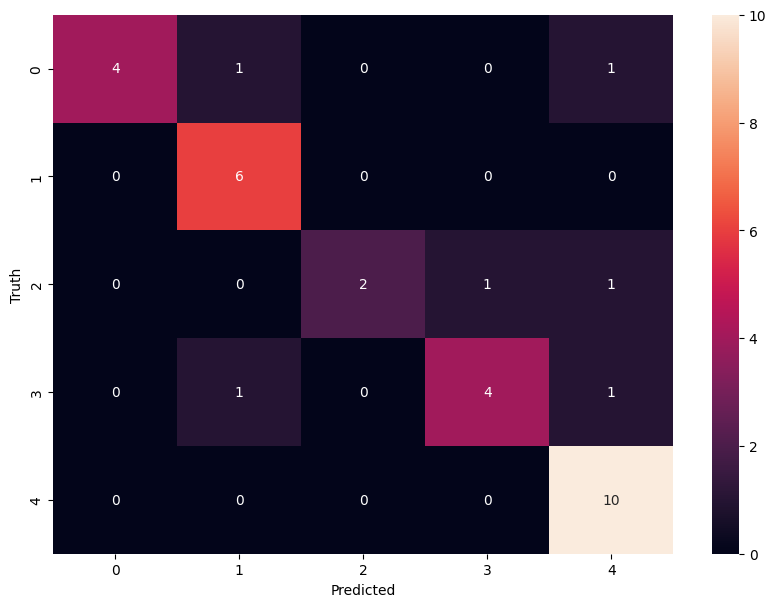

In [67]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [68]:
class_dict

{'roger_federer': 0,
 'morgan': 1,
 'serena_williams': 2,
 'lionel_messi': 3,
 'maria_sharapova': 4}

In [69]:
import joblib
joblib.dump(best_clf, "best_model.pkl")

['best_model.pkl']

In [70]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))